##PORTFOLIO PROJECT: AUTO INSURANCE CRIMINAL DECEPTION

### PROBLEM STATEMENT

The goal of this project is to build a model that can detect auto insurance fraud. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims. This type of problems is known as imbalanced class classification. 

Frauds are unethical and are losses to the company. By building a model that can classify auto insurance fraud, I am able to cut losses for the insurance company. 

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


DATA PREPROCESSING

In [ ]:
#Import the data and check the shape

insurance_data = pd.read_csv('/content/drive/My Drive/Auto insurance_PORTFOLIO/insurance_claims.csv')
print(insurance_data.shape)
insurance_data.head()

(1000, 39)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
# list of columns not necessary for prediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

# dropping the unnecessary columns
insurance_data.drop(columns=cols_to_drop,inplace=True)

# checking the data after dropping the columns
insurance_data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


HANDLING MISSING VALUES

In [ ]:
# Checking for null values in the dataset

data = insurance_data.replace('?',np.NaN)

data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

There are missing values in the column collision_type, property_damage and police_report_available

In [ ]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [ ]:
# imputing the missing values from the column

data['collision_type']=imputer.fit_transform(data['collision_type'])
data['property_damage']=imputer.fit_transform(data['property_damage'])
data['police_report_available']=imputer.fit_transform(data['police_report_available'])

In [ ]:
#Re-checking the missing values
data.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [ ]:
# Understanding the numerical and categorical data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [ ]:
# Extracting the categorical columns
cat_df = data.select_dtypes(include=['object']).copy()

cat_df.head()  

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


In [ ]:
#Let us understand some of the categorical variables before encoding them
cat_df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [ ]:
cat_df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [ ]:
cat_df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [ ]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})

cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})

cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})

cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})

cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})

cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})

cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one



In [ ]:
# auto encoding of categorical variables
for col in cat_df.drop(columns=['policy_csl','insured_sex','insured_education_level','incident_severity','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [ ]:
# data after encoding
print(cat_df.shape)
cat_df.head()

(1000, 34)


,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


In [ ]:
# extracting the numerical columns

num_df = data.select_dtypes(include=['int64']).copy()
print(num_df.shape)
num_df.head()

(1000, 14)


,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [ ]:
# concatenating the Numerical and categorical dataframes to get the final dataset
ins_df_final=pd.concat([num_df,cat_df], axis=1)
print(ins_df_final.shape)
ins_df_final.head()

(1000, 48)


,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


In [ ]:
# separating the feature and target columns
X=ins_df_final.drop('fraud_reported',axis=1)
y=ins_df_final['fraud_reported']

EXPLORATORY DATA ANALYSIS

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

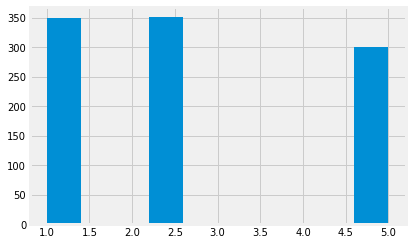

In [ ]:
import matplotlib.pyplot as plt
%matplotlib  inline

# we'll look at the distribution of data in some columns now
plt.hist(ins_df_final['policy_csl'])
# we  can see that for almost all categories of CSL the data is uniformly distributed

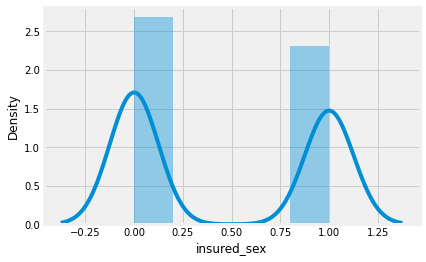

In [ ]:
import seaborn as sns
sns.distplot(ins_df_final['insured_sex'])


we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

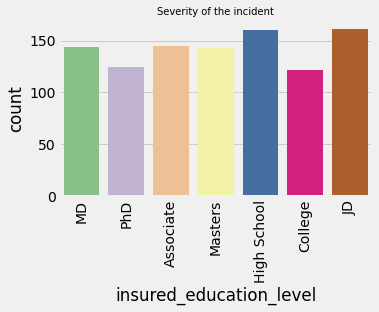

In [ ]:
# let's check the incident severity

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (5, 3)

sns.countplot(data['insured_education_level'], palette = 'Accent')
plt.title('Severity of the incident', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

From the distribution plot we can see that for almost all categories of the education level of the person insured the data is uniformly distributed

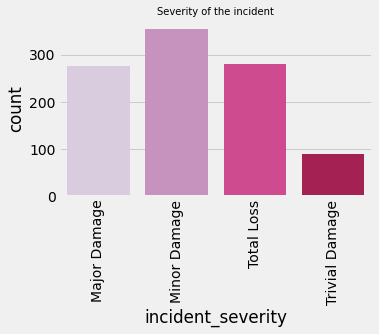

In [ ]:
# let's check the incident severity

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (5, 3)

sns.countplot(data['incident_severity'], palette = 'PuRd')
plt.title('Severity of the incident', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.

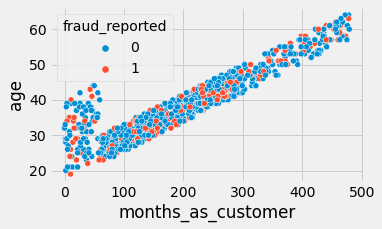

In [ ]:
sns.scatterplot(ins_df_final['months_as_customer'],ins_df_final['age'], hue=ins_df_final['fraud_reported'] )

From the above scatter plot it can be concluded that most of the fraud cases are done by the customers new 
to the company and that too comparatively younger ones. There is a high and positive correlation between age of the driver and the months they have been engaged to the insurance company.

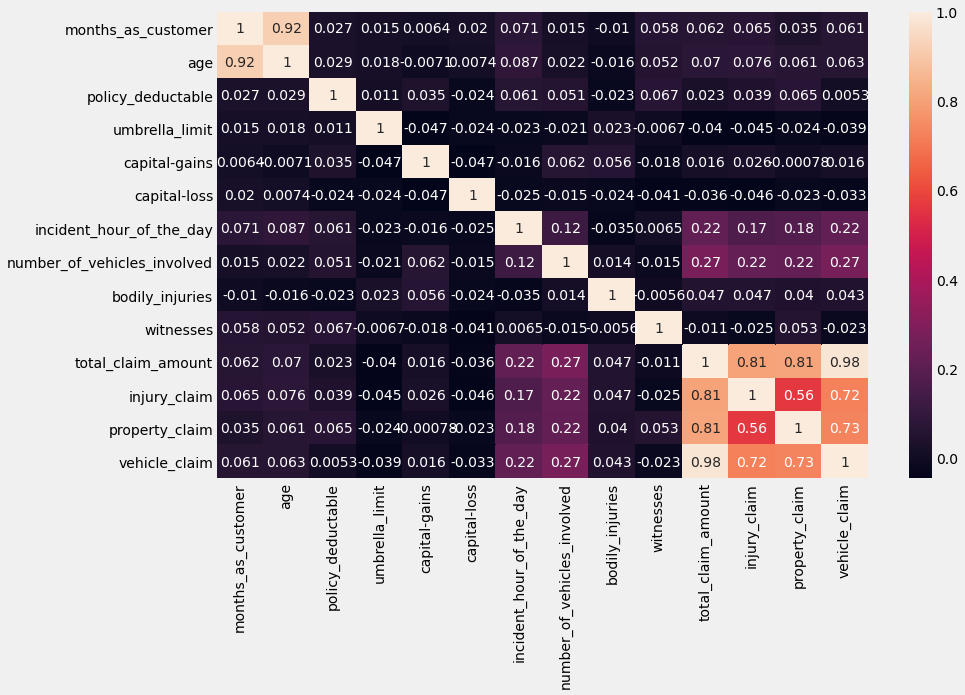

In [ ]:
# Check correlation using heat map
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

From the heat map, we can see that there is high correlation between Age and the number of months. The correlation co-efficient recorded is 0.92, we'll drop the age column. Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [ ]:
X.drop(columns=['age','total_claim_amount'], inplace=True)

In [ ]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=355)

X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,6860,61740,1.0,0,6,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
244,95,1000,0,0,-70300,3,1,1,2,640,320,2240,2.5,1,5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
595,56,500,0,0,-28800,13,1,1,2,0,6500,52000,1.0,1,1,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
873,322,2000,0,0,-46000,18,1,0,2,7680,7680,26880,2.5,0,7,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
631,147,1000,6000000,0,-48400,2,2,1,2,9760,4880,39040,5.0,0,5,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
num_df_train=X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]
print(X_train.shape)
print(num_df_train.shape)

(750, 45)
(750, 12)


In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_df_train)
scaled_num_df_train= pd.DataFrame(data=scaled_data, columns=num_df_train.columns,index=X_train.index)
scaled_num_df_train.shape


(750, 12)

In [ ]:
#Checking for missing values in the scaled data
scaled_num_df_train.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

There are no missing values in the scaled numerical dataframe

In [ ]:
X_train.drop(columns=scaled_num_df_train.columns, inplace=True)
print(X_train.shape)
X_train.head()

(750, 33)


,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,1.0,0,6,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
244,2.5,1,5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
595,1.0,1,1,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
873,2.5,0,7,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
631,5.0,0,5,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
X_train=pd.concat([scaled_num_df_train,X_train],axis=1)
print(X_train.shape)
X_train.head()

(750, 45)


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.43186,1.285251,-0.128241,1.270329,1.0,0,6,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.43186,-1.393623,-1.490999,-1.909700,2.5,1,5,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.43186,-1.524700,-0.203255,0.749767,1.0,1,1,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.43186,0.048217,0.042625,-0.592794,2.5,0,7,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.43186,0.474215,-0.540819,0.057108,5.0,0,5,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
